In [15]:
import numpy as np
import matplotlib.pyplot as plt
from config import *
from pynverse import inversefunc

In [16]:
PION_MEAN_LIFETIME = 2.6033e-8

In [17]:
t_begin = 0
t_end = 1.2e-5 # max 1.2e-5 else np.exp in N_CFD throws an error maybe fix by replace nan values with np.inf
N0 = 10000
times = np.linspace(t_begin, t_end, N0)
Ns = N(times, 10000)
N_max = Ns.max()
t_max = times[np.argmax(Ns)]
t_max


np.float64(1.1641164116411641e-07)

In [18]:
Ns_CDF = N_CDF(times, 10000)
Ns_CDF

array([0.00000000e+00, 1.23977072e-01, 4.88342235e-01, ...,
       9.95699517e+03, 9.95701865e+03, 9.95704213e+03], shape=(10000,))

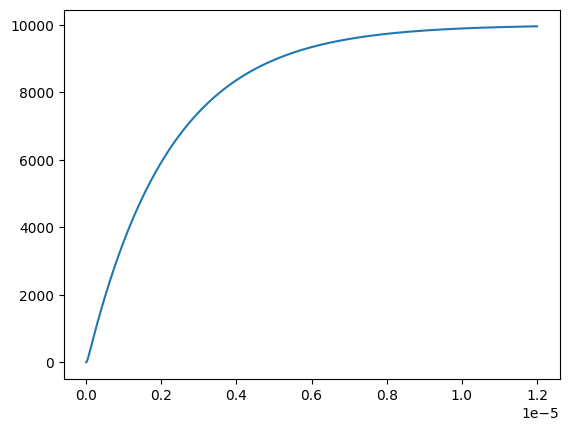

In [19]:
plt.plot(times, Ns_CDF)

/Users/tillboehringer/Dropbox/Studium/Physik/Semester4/PHY241_Project/PHY241/Code/config.py:27: RuntimeWarning: overflow encountered in exp
  second_part = - (t1 * exp(x / t2) - t2 * exp(x / t1)) * exp(- x / t2 - x / t1) - t2 + t1
/Users/tillboehringer/Dropbox/Studium/Physik/Semester4/PHY241_Project/PHY241/Code/config.py:27: RuntimeWarning: invalid value encountered in scalar subtract
  second_part = - (t1 * exp(x / t2) - t2 * exp(x / t1)) * exp(- x / t2 - x / t1) - t2 + t1
/Users/tillboehringer/Dropbox/Studium/Physik/Semester4/PHY241_Project/PHY241/.venv/lib/python3.10/site-packages/pynverse/inverse.py:194: RuntimeWarning: Results obtained with less than 2 decimal digits of accuracy
  warnings.warn("Results obtained with less than %g "


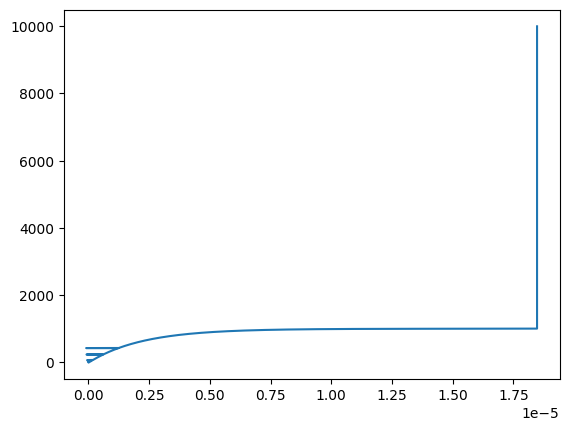

In [20]:
CDF_inv = inversefunc(N_CDF, args=(1000))
plt.plot(CDF_inv(np.arange(0, 10000)), np.arange(0, 10000))

In [21]:
inv_N1 = inversefunc(N, args=(N0), domain=[t_begin,t_max], open_domain=[False,False])
inv_N2 = inversefunc(N, args=(N0), domain=[t_max,t_end], open_domain=[False,False])

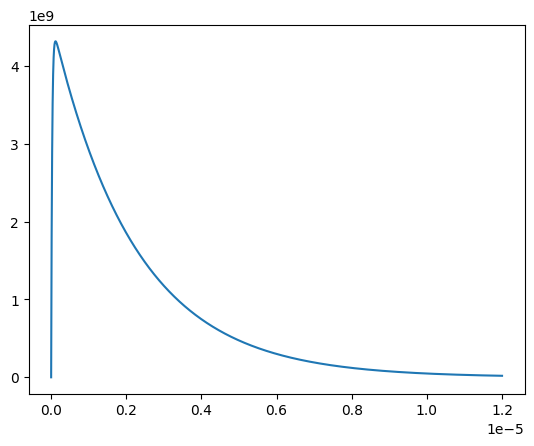

In [22]:
plt.plot(times, Ns)

In [23]:
Ns_inv = np.linspace(1e-10, int(N_max), 1000)
times1 = inv_N1(Ns_inv)
times2 = inv_N2(Ns_inv)

/Users/tillboehringer/Dropbox/Studium/Physik/Semester4/PHY241_Project/PHY241/.venv/lib/python3.10/site-packages/pynverse/inverse.py:194: RuntimeWarning: Results obtained with less than 2 decimal digits of accuracy
  warnings.warn("Results obtained with less than %g "


ValueError: Requested values [1.00000000e-10 4.32024252e+06 8.64048504e+06 1.29607276e+07
 1.72809701e+07] lower than the lower limit 1.95531e+07 of the image

(1e-07, 2e-07)

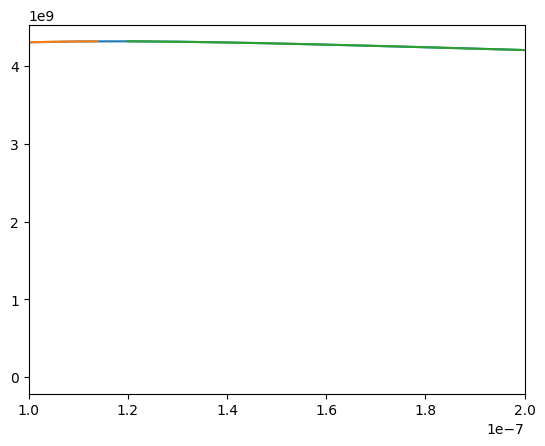

In [ ]:
plt.plot(times, Ns)
plt.plot(times1, Ns_inv)
plt.plot(times2, Ns_inv)
plt.xlim([1e-7,2e-7])